<a href="https://colab.research.google.com/github/WANG-Yuchen-Alice/BakingHome/blob/master/3244LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import nltk
nltk.download('punkt')

import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import nltk
import re 

import seaborn as sns #need to install with conda

from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS

# import keras #remove tensorflow.
from tensorflow.keras.preprocessing.text import one_hot, Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding, Input, LSTM, Conv1D, MaxPool1D, Bidirectional
from tensorflow.keras.models import Model 

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls "/content/drive/My Drive/CS3244"

Fake.csv  True.csv


In [ ]:
df_fake = pd.read_csv("/content/drive/My Drive/CS3244/Fake.csv")
df_true = pd.read_csv("/content/drive/My Drive/CS3244/True.csv")

In [ ]:
df_true['isfake'] = 1
df_fake['isfake'] = 0

In [ ]:
df = pd.concat([df_true, df_fake]).reset_index(drop = True)

In [ ]:
df.drop(columns = ['date'], inplace = True)

In [ ]:
df.head

<bound method NDFrame.head of                                                    title  ... isfake
0      As U.S. budget fight looms, Republicans flip t...  ...      1
1      U.S. military to accept transgender recruits o...  ...      1
2      Senior U.S. Republican senator: 'Let Mr. Muell...  ...      1
3      FBI Russia probe helped by Australian diplomat...  ...      1
4      Trump wants Postal Service to charge 'much mor...  ...      1
...                                                  ...  ...    ...
44893  McPain: John McCain Furious That Iran Treated ...  ...      0
44894  JUSTICE? Yahoo Settles E-mail Privacy Class-ac...  ...      0
44895  Sunnistan: US and Allied ‘Safe Zone’ Plan to T...  ...      0
44896  How to Blow $700 Million: Al Jazeera America F...  ...      0
44897  10 U.S. Navy Sailors Held by Iranian Military ...  ...      0

[44898 rows x 4 columns]>

In [ ]:
df['original'] = df['title'] + ' ' + df['text']
df.head()

,title,text,subject,isfake,original
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,1,"As U.S. budget fight looms, Republicans flip t..."
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,1,U.S. military to accept transgender recruits o...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,1,Senior U.S. Republican senator: 'Let Mr. Muell...
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,1,FBI Russia probe helped by Australian diplomat...
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,1,Trump wants Postal Service to charge 'much mor...


In [ ]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'to', 'as'])

In [ ]:
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and token not in stop_words and len(token) > 3:
            result.append(token)
            
    return result

In [ ]:
df['clean'] = df['original'].apply(preprocess)

In [ ]:
print(df['clean'][0])

['budget', 'fight', 'looms', 'republicans', 'flip', 'fiscal', 'script', 'washington', 'reuters', 'head', 'conservative', 'republican', 'faction', 'congress', 'voted', 'month', 'huge', 'expansion', 'national', 'debt', 'cuts', 'called', 'fiscal', 'conservative', 'sunday', 'urged', 'budget', 'restraint', 'keeping', 'sharp', 'pivot', 'republicans', 'representative', 'mark', 'meadows', 'speaking', 'face', 'nation', 'drew', 'hard', 'line', 'federal', 'spending', 'lawmakers', 'bracing', 'battle', 'january', 'return', 'holidays', 'wednesday', 'lawmakers', 'begin', 'trying', 'pass', 'federal', 'budget', 'fight', 'likely', 'linked', 'issues', 'immigration', 'policy', 'november', 'congressional', 'election', 'campaigns', 'approach', 'republicans', 'seek', 'control', 'congress', 'president', 'donald', 'trump', 'republicans', 'want', 'budget', 'increase', 'military', 'spending', 'democrats', 'want', 'proportional', 'increases', 'defense', 'discretionary', 'spending', 'programs', 'support', 'educati

In [ ]:
list_of_words = []
for i in df.clean:
    for j in i:
        list_of_words.append(j)

In [ ]:
total_words = len(list(set(list_of_words)))
total_words

108705

In [ ]:
df['clean_joined'] = df['clean'].apply(lambda x: " ".join(x))

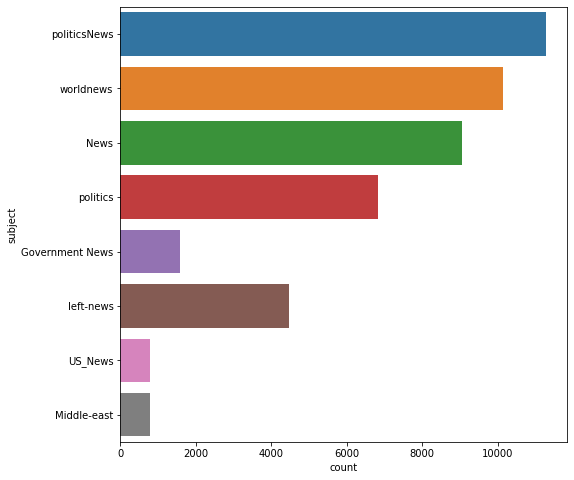

In [ ]:
plt.figure(figsize = (8, 8))
sns.countplot(y = "subject", data = df)

In [ ]:
maxlen = -1
for doc in df.clean_joined:
    tokens = nltk.word_tokenize(doc)
    if(maxlen<len(tokens)):
        maxlen = len(tokens)
print("The maximum number of words in any document is =", maxlen)

The maximum number of words in any document is = 4406


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.clean_joined, df.isfake, test_size = 0.2)

In [ ]:
from nltk import word_tokenize

In [ ]:
tokenizer = Tokenizer(num_words = total_words)
tokenizer.fit_on_texts(x_train)
train_sequences = tokenizer.texts_to_sequences(x_train)
test_sequences = tokenizer.texts_to_sequences(x_test)

In [ ]:
print("The encoding for document\n",df.clean_joined[0],"\n is : ",train_sequences[0])

The encoding for document
 budget fight looms republicans flip fiscal script washington reuters head conservative republican faction congress voted month huge expansion national debt cuts called fiscal conservative sunday urged budget restraint keeping sharp pivot republicans representative mark meadows speaking face nation drew hard line federal spending lawmakers bracing battle january return holidays wednesday lawmakers begin trying pass federal budget fight likely linked issues immigration policy november congressional election campaigns approach republicans seek control congress president donald trump republicans want budget increase military spending democrats want proportional increases defense discretionary spending programs support education scientific research infrastructure public health environmental protection trump administration willing going increase defense discretionary spending percent meadows chairman small influential house freedom caucus said program democrats say

In [ ]:
padded_train = pad_sequences(train_sequences,maxlen = 40, padding = 'post', truncating = 'post')
padded_test = pad_sequences(test_sequences,maxlen = 40, truncating = 'post')

In [ ]:
for i,doc in enumerate(padded_train[:2]):
     print("The padded encoding for document",i+1," is : ",doc)

The padded encoding for document 1  is :  [ 1503    39   102  1864     6  1423   625   143     3     6   118    60
    37   639 19658   367   625   143 15240   300   503  3235    42    41
  1503  1713   676    95    29     3    41   346  2416    49  7155  5569
     3 14131  1139  3762]
The padded encoding for document 2  is :  [ 5174   296  2367   888  1326  3369   168  6767  1144   372   248  1477
  1031  4946 10646  8688  1142  8631   766  3063 14790 17222  3063  1033
 22505 11142   256   256 30527 49590     4  3236 17538    44    59   157
   397    16    12    64]


In [ ]:
# Sequential Model
model = Sequential()

# embeddidng layer
model.add(Embedding(total_words, output_dim = 128))
# model.add(Embedding(total_words, output_dim = 240))

# Bi-Directional RNN and LSTM
model.add(Bidirectional(LSTM(128)))

# Dense layers
model.add(Dense(128, activation = 'relu'))
model.add(Dense(1,activation= 'sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 128)         13914240  
_________________________________________________________________
bidirectional (Bidirectional (None, 256)               263168    
_________________________________________________________________
dense (Dense)                (None, 128)               32896     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 14,210,433
Trainable params: 14,210,433
Non-trainable params: 0
_________________________________________________________________


In [ ]:
y_train = np.asarray(y_train)

In [ ]:
model.fit(padded_train, y_train, batch_size = 64, validation_split = 0.1, epochs = 2)

Epoch 1/2
506/506 [==============================] - 160s 317ms/step - loss: 0.0405 - acc: 0.9851 - val_loss: 0.0069 - val_acc: 0.9981
Epoch 2/2
506/506 [==============================] - 163s 322ms/step - loss: 0.0018 - acc: 0.9997 - val_loss: 0.0479 - val_acc: 0.9930


Model Accuracy :  0.988641425389755


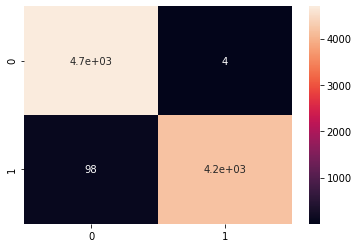

In [ ]:
pred = model.predict(padded_test)
prediction = []
for i in range(len(pred)):
    if pred[i].item() > 0.5:
        prediction.append(1)
    else:
        prediction.append(0)
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(list(y_test), prediction)

print("Model Accuracy : ", accuracy)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(list(y_test), prediction)
#plt.figure(figsize = (25, 25))
sns.heatmap(cm, annot = True)

category = { 0: 'Fake News', 1 : "Real News"}